# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
from skimage.filters import gaussian, prewitt , roberts, sobel_h, sobel_v, sobel
from skimage.feature import canny
from scipy.signal import convolve2d
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

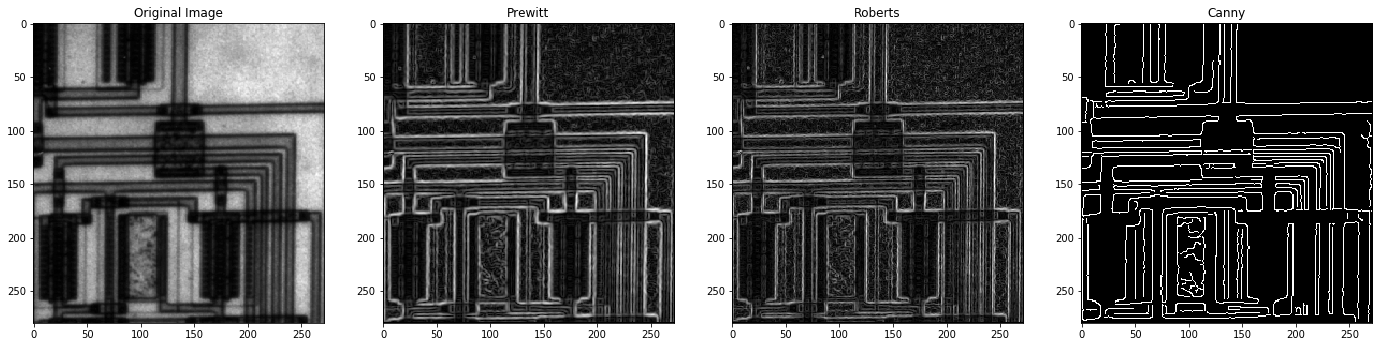

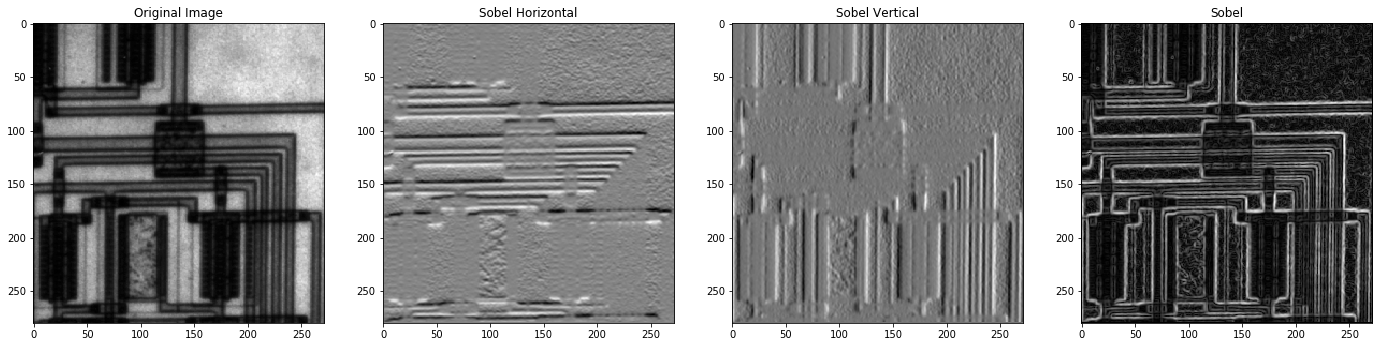

In [3]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('circuit.tif'))
#PREWITT: it uses a 2 3x3 kernels for the Vertical and Horizontal components and Calculates the resultant
prewitt_img = prewitt(img)
#ROBERTS: it uses 2 2x2 kernels with a cross shape and calculates the resultant 
roberts_img = roberts(img)
#CANNY: it uses gaussian blurring then sobel operator then thins the edges then performs thresholding
# sigma: is the guassian blur simga, Low and high threshold control lower and upper bounds of the edge linking
canny_img = canny(img,sigma=1.3,low_threshold=25,high_threshold=60)
#SOBEL HORIZONTAL: uses a 3x3 kernel to calculate the difference in the vertical gradient
sobel_h_img = sobel_h(img)
#SOBEL VERTICAL: uses a 3x3 kernel to calculate the difference in the horizontal gradient
sobel_v_img = sobel_v(img)
#SOBEL: The same as prewitt but focuses on the middle neighbouring pixel more than the others
sobel_img = sobel(img)

Builtinarray = []
Builtinarray2 = []

Builtinarray.append(img)
Builtinarray.append(prewitt_img)
Builtinarray.append(roberts_img)
Builtinarray.append(canny_img)

Builtinarray2.append(img)
Builtinarray2.append(sobel_h_img)
Builtinarray2.append(sobel_v_img)
Builtinarray2.append(sobel_img)

names = ["Original Image", "Prewitt", "Roberts", "Canny"]
names2 = ["Original Image", "Sobel Horizontal", "Sobel Vertical", "Sobel"]
show_images(Builtinarray,names)
show_images(Builtinarray2,names2)


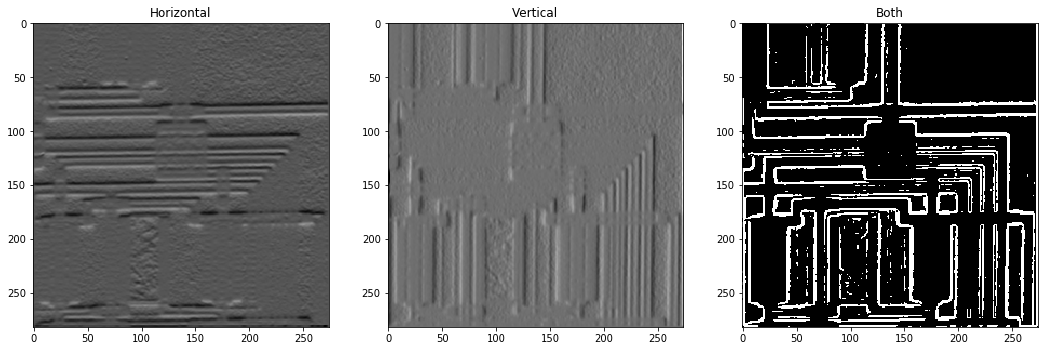

In [8]:
# 2. Custom Sobel (V-H-Both)
def custom_sobel(path):
    img = rgb2gray(io.imread(path))
    hx = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ])
    hy = np.array([
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
    ])
    array = []
    cs_img_x = convolve2d(img,hx)
    cs_img_y = convolve2d(img,hy)
    cs_img = np.sqrt(cs_img_x**2+cs_img_y**2)
    cs_img = cs_img > 120
    
    array.append(cs_img_y)
    array.append(cs_img_x)
    array.append(cs_img)
    names = ["Horizontal","Vertical","Both"]
    show_images(array,names)
 

custom_sobel('circuit.tif')


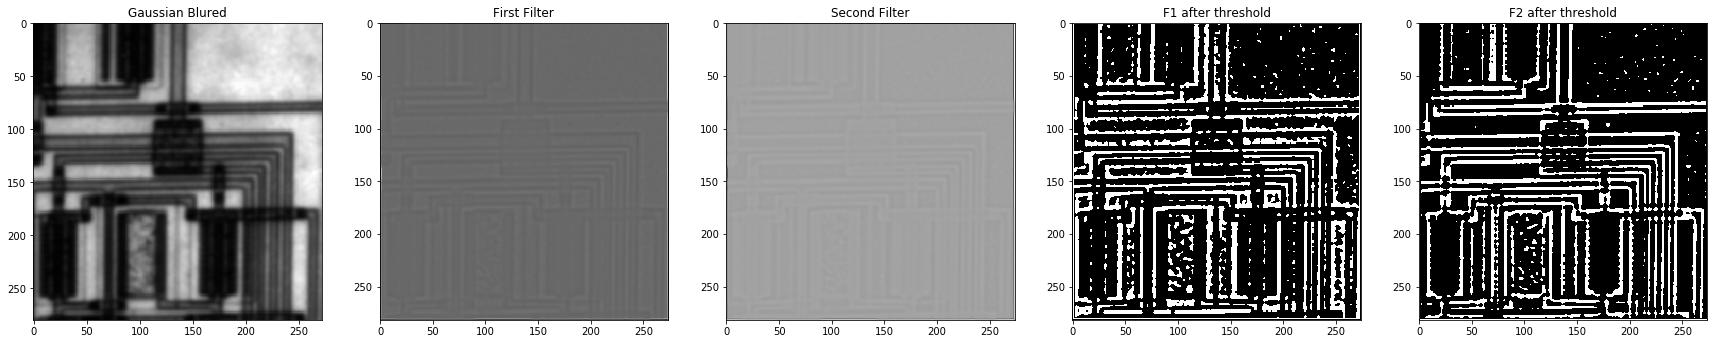

In [36]:
# 3. Custom LoG
thres= 20
img = rgb2gray(io.imread('circuit.tif'))

imgsArray = []
labelArray = []

# Applying gaussian filter
bluredImg = gaussian(img,1.5)

f1 = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

f2 = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

imgsArray.append(bluredImg)
labelArray.append("Gaussian Blured")

img_f1 = convolve2d(bluredImg,f1)
img_f2 = convolve2d(bluredImg,f2)

imgsArray.append(img_f1)
labelArray.append("First Filter")
imgsArray.append(img_f2)
labelArray.append("Second Filter")

img_f1_after_threshold = img_f1 > 0.03
img_f2_after_threshold = img_f2 > 0.01

imgsArray.append(img_f1_after_threshold)
labelArray.append("F1 after threshold")
imgsArray.append(img_f2_after_threshold)
labelArray.append("F2 after threshold")

show_images(imgsArray,labelArray)



In [ ]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''